In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [157]:
exclude_labels = []
train = pd.read_parquet('./data/TRAIN_person3_car2_dog3_cow2_noise3.parquet').sample(frac=0.3)
train = train[~train['label'].isin(exclude_labels)]
train_matrices = train.iloc[:, 1:].values.reshape(-1, 500, 52).transpose(0, 2, 1).astype(np.float16)
scale_factor = train_matrices.mean()

test = pd.read_parquet('./data/TEST_person3_car2_dog3_cow2_noise3.parquet').sample(frac=1)
test = test[~test['label'].isin(exclude_labels)]
test_matrices = test.iloc[:, 1:].values.reshape(-1, 500, 52).transpose(0, 2, 1).astype(np.float16)

train_carrier_means = train_matrices.mean(axis=2)
train_carrier_stds = train_matrices.std(axis=2)

test_carrier_means = test_matrices.mean(axis=2)
test_carrier_stds = test_matrices.std(axis=2)

train_features = np.concatenate([train_carrier_means, train_carrier_stds], axis=1)
test_features = np.concatenate([test_carrier_means, test_carrier_stds], axis=1)

In [158]:
train_features.itemsize * train_features.size / 1000

89.024

In [136]:
print(train.shape)
print(test.shape)

(1428, 26001)
(385, 26001)


1.0


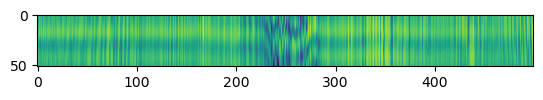

In [137]:
i = 600
print(train['label'][i])
plt.imshow(train_matrices[i])

1.0


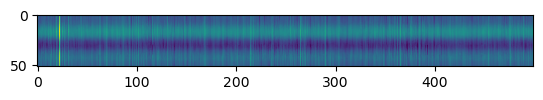

In [138]:
i = 130
print(test['label'][i])
plt.imshow(test_matrices[i])

In [159]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_features, train['label'])


KNeighborsClassifier()

In [160]:
preds = model.predict(test_features)
print(accuracy_score(test['label'], preds))

0.9064935064935065


<Axes: >

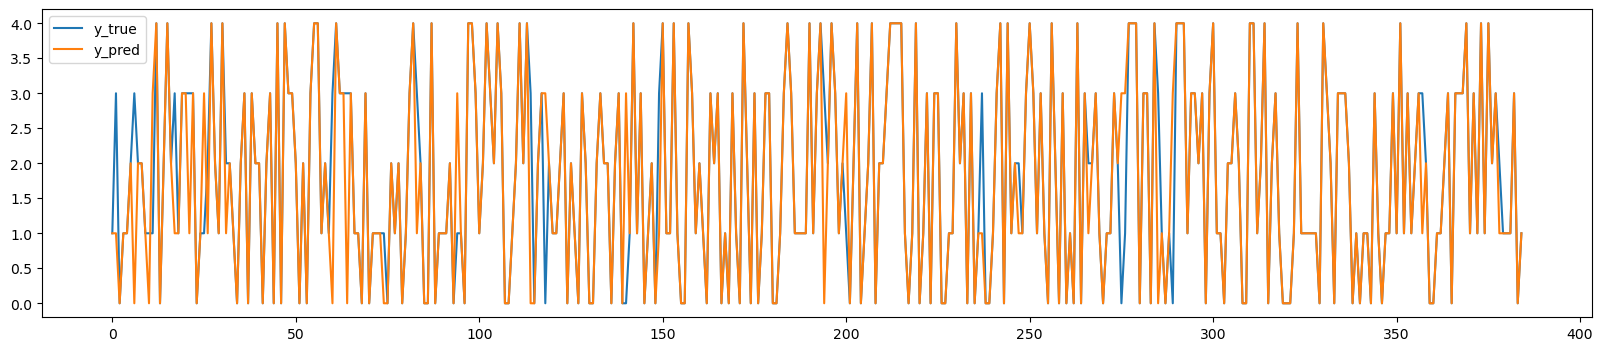

In [141]:
results = pd.DataFrame()
results['y_true'] = test['label'].values
results['y_pred'] = preds

fig,ax = plt.subplots(1, 1, figsize=(20, 4))
results.plot(ax=ax)